<a href="https://colab.research.google.com/github/nuhaaaaan/Machine-Learning-Assignments-/blob/main/exercise_6_pca_tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercise 6: Build a PCA and t-SNE
##### (15 points) --> your total will divided by 3 to get 5 points for this exercise.


---

In this Exercise, we will reinforce our knowledge of PCA and t-SNE using the Wine dataset.

#####
**Dataset:**
You can find the dataset (wine.data) under the datasets section on the Canvas.

**About Dataset**
The Wine dataset (https://archive.ics.uci.edu/ml/datasets/Wine) is a collection of attributes regarding the chemical analysis of wine from Italy from three different producers, but the same type of wine for each producer. This information could be used as an example to verify the validity of a bottle of wine made from the grapes from a specific region in Italy. The 13 attributes are Alcohol, Malic acid, Ash, Alkalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, and Proline.



To disable Python warnings

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Step to do:

    1. Import pandas, numpy, and matplotlib, as well as the t-SNE and PCA models from scikit-learn (1 point)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

    2. Load the Wine dataset in datafram without header and display the first five rows of data. (1 point)

In [ ]:
data = pd.read_csv('wine.data.csv', header=None)

    3. The first column contains the labels; extract this column as labels and remove it from the dataset. (1 point)

In [ ]:
# Extract the labels (first column) and remove it from the dataset
labels = data.iloc[:, 0].values  # Extracting labels
data = data.iloc[:, 1:]  # Removing the first column (labels) from the dataset

# Display the first few rows to verify the changes
print(data.head())
print("Labels extracted:", labels[:5])  # Display the first 5 labels to verify

      1     2     3     4    5     6     7     8     9     10    11    12  \
0  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735  
Labels extracted: [1 1 1 1 1]


    4.Execute PCA to reduce the dataset to the first six components. (2 points)

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dataset to the first 6 components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(data)

# Display the shape of the transformed data to confirm it has 6 components
print("Shape of PCA-reduced data:", X_pca.shape)

Shape of PCA-reduced data: (178, 6)


    5. Determine the amount of variance within the data described by these six components. (1 point)

In [ ]:
# Display the explained variance ratio for each of the first 6 components
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio and the cumulative variance
print("Explained variance ratio for each of the first 6 components:", explained_variance_ratio)
print("Cumulative explained variance:", np.cumsum(explained_variance_ratio))

# Total variance explained by the first 6 components
total_variance_explained = np.sum(explained_variance_ratio)
print("Total variance explained by the first 6 components:", total_variance_explained)

Explained variance ratio for each of the first 6 components: [9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05
 1.23636847e-05 8.46213034e-06]
Cumulative explained variance: [0.99809123 0.99982715 0.99992211 0.99997232 0.99998469 0.99999315]
Total variance explained by the first 6 components: 0.99999314824536


    6. Create a t-SNE model using a specified random state and a verbose value of 1 (1 point)

In [ ]:
from sklearn.manifold import TSNE

# Create a t-SNE model with a specified random state and verbose value of 1
tsne = TSNE(n_components=2, random_state=42, verbose=1)

# Fit the t-SNE model to the PCA-reduced data (or original data if needed)
X_tsne = tsne.fit_transform(data)

# Display the shape of the transformed data
print("Shape of t-SNE-reduced data:", X_tsne.shape)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.073s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 52.476897
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.411373
[t-SNE] KL divergence after 1000 iterations: 0.104741
Shape of t-SNE-reduced data: (178, 2)


    7. Fit the data to the t-SNE model. (1 point)

In [ ]:
# Fit the data to the t-SNE model and transform it to 2D
X_tsne = tsne.fit_transform(data)

# Display the shape of the transformed data to confirm it has 2 components
print("Shape of t-SNE-reduced data:", X_tsne.shape)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 52.476897
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.411373
[t-SNE] KL divergence after 1000 iterations: 0.104741
Shape of t-SNE-reduced data: (178, 2)


    8. Confirm that the shape of the t-SNE fitted data is two-dimensional ( 1 point)

In [ ]:
# Confirm the shape of the t-SNE fitted data
if X_tsne.shape[1] == 2:
    print("The t-SNE fitted data is two-dimensional.")
else:
    print("The t-SNE fitted data is not two-dimensional.")

The t-SNE fitted data is two-dimensional.


    9. Create a scatter plot of the two-dimensional data (first and second features) (2 points)

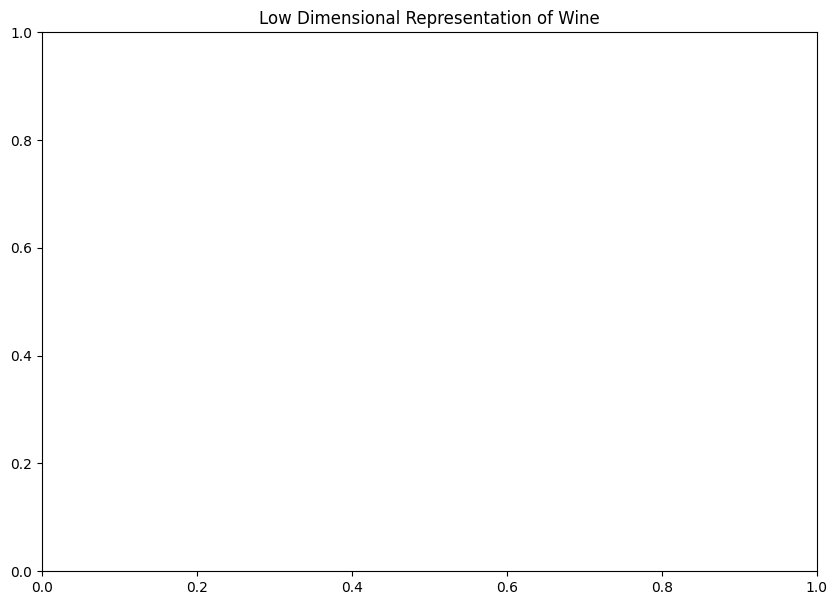

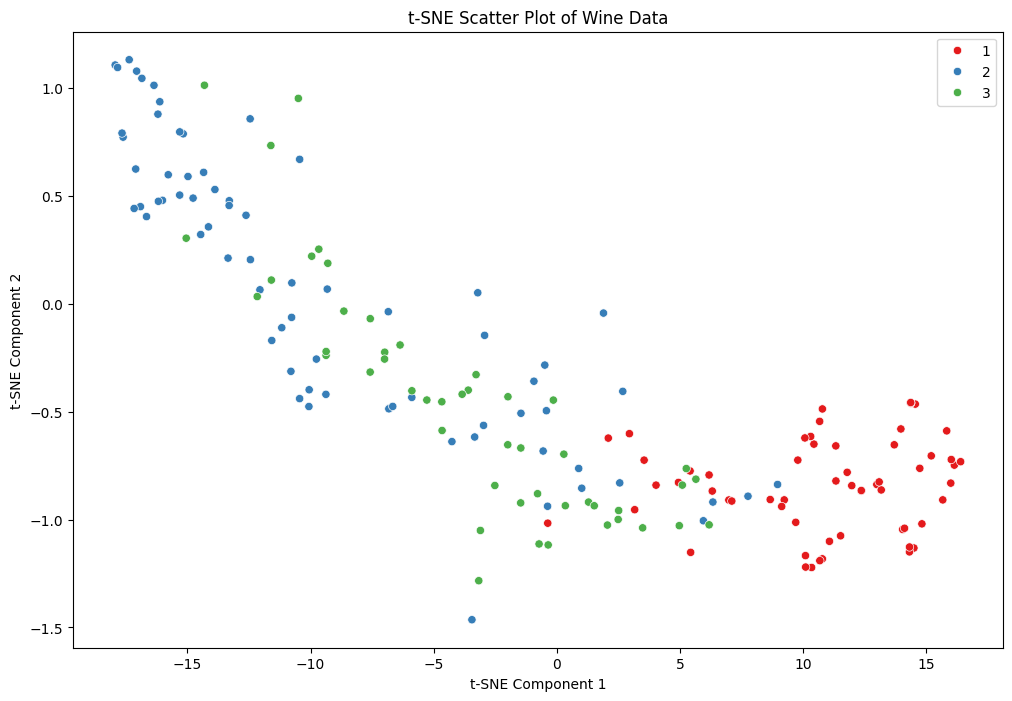

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of Wine')

## write your code here:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of the t-SNE data
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette="Set1", legend="full")
plt.title("t-SNE Scatter Plot of Wine Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

    10. Create a secondary scatter plot of the two-dimensional data with the class labels applied to visualize any clustering that may be present (2 points)

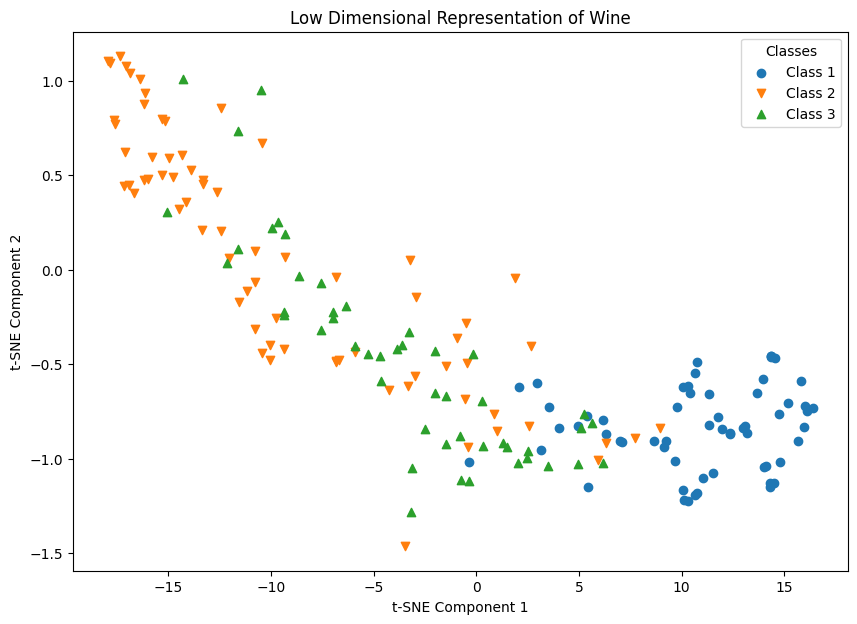

In [ ]:


## write your code here:
import matplotlib.pyplot as plt

# Define the markers for the scatter plot
markers = ['o', 'v', '^']

# Create a scatter plot with class labels as markers
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of Wine')

# Iterate over each class and plot it with a different marker
for i, label in enumerate(np.unique(labels)):
    mask = (labels == label)
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], marker=markers[i % len(markers)], label=f'Class {label}')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Classes')
plt.show()

    11. Construct a loop that iterates through the perplexity values (1, 5, 20, 30, 80, 160, 320). For each loop, generate a t-SNE model with the corresponding perplexity and print a scatter plot of the labeled wine classes. Note the effect of different perplexity values. (2 points)

Number of samples in the dataset: 178
Number of samples in the dataset: 178
[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 0.728442
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.364731
[t-SNE] KL divergence after 1000 iterations: 0.438307


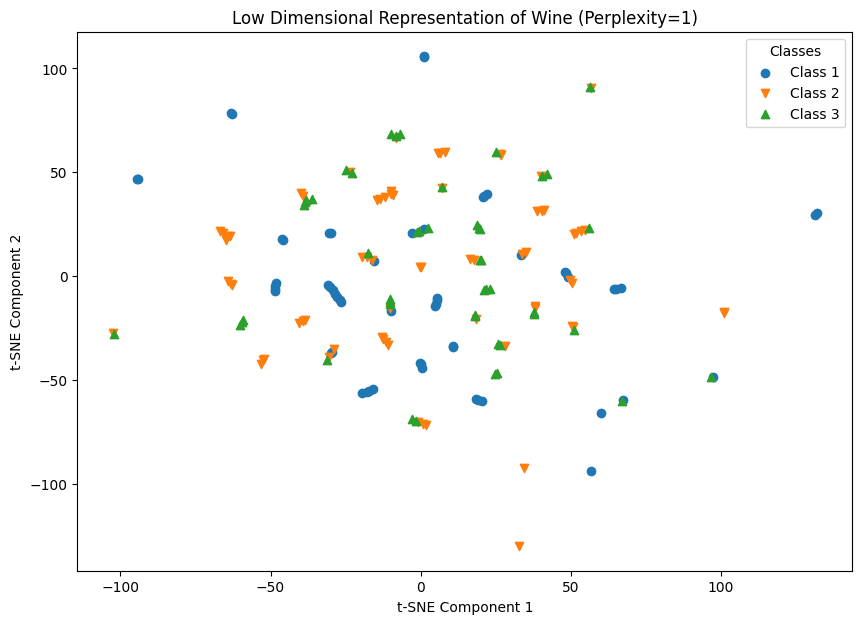

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 11.288603
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.224461
[t-SNE] KL divergence after 1000 iterations: 0.203509


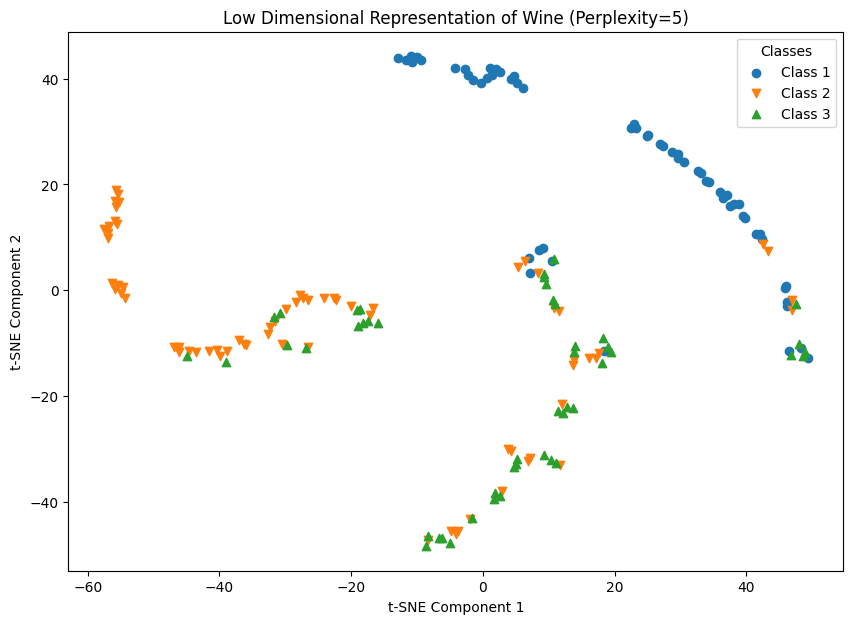

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 36.061430
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.009090
[t-SNE] KL divergence after 1000 iterations: 0.131862


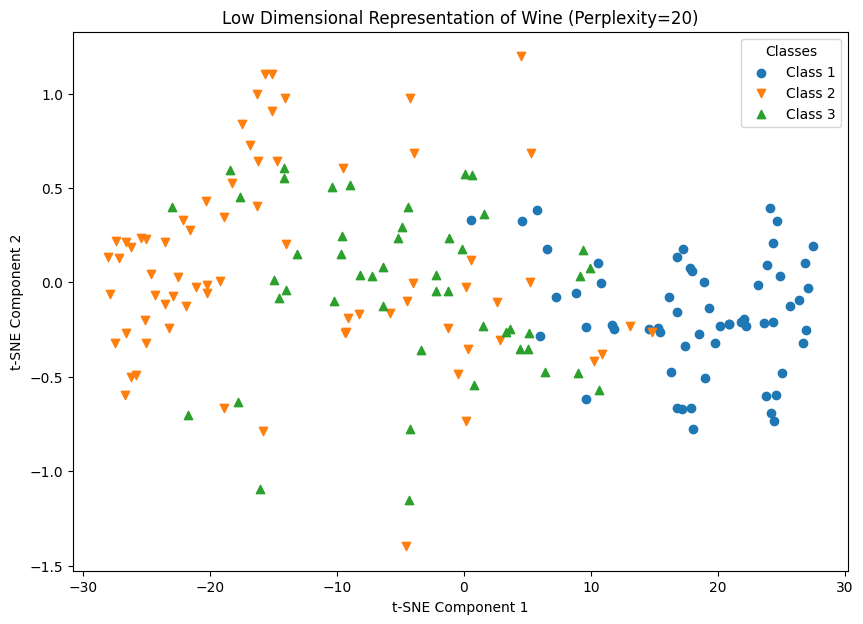

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.002s...
[t-SNE] Computed neighbors for 178 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 52.476897
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.411373
[t-SNE] KL divergence after 1000 iterations: 0.104741


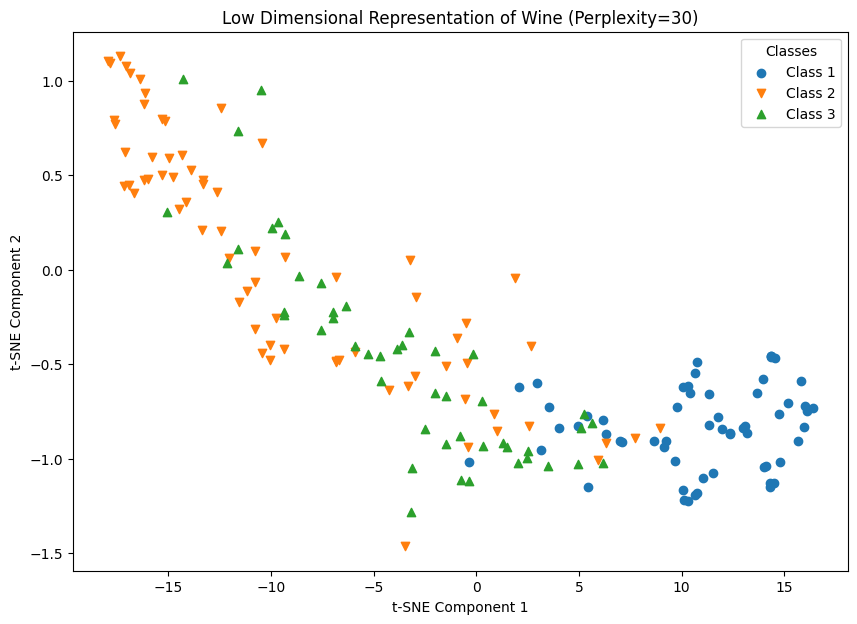

[t-SNE] Computing 177 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 150.912124
[t-SNE] KL divergence after 250 iterations with early exaggeration: 38.784050
[t-SNE] KL divergence after 750 iterations: 0.027982


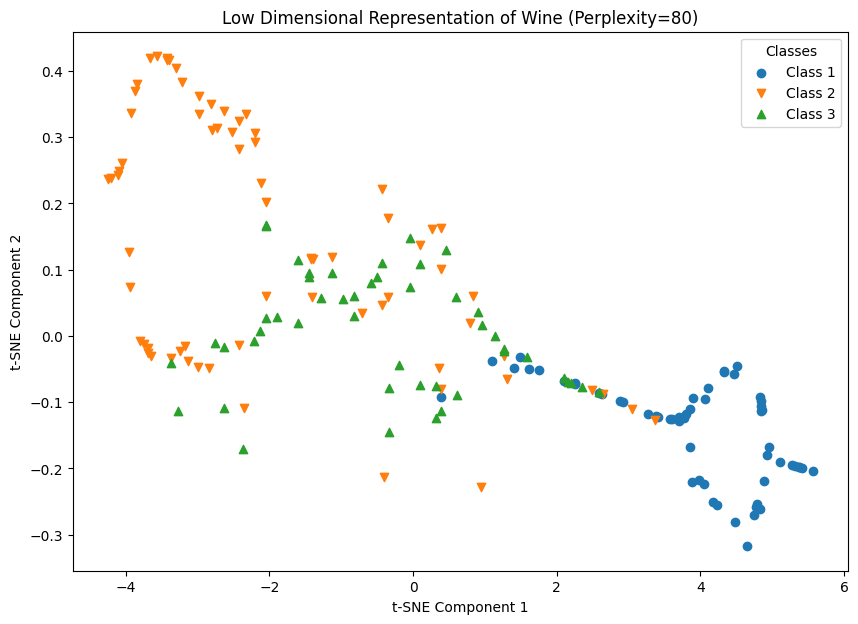

[t-SNE] Computing 177 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 544.541650
[t-SNE] KL divergence after 250 iterations with early exaggeration: 30.812246
[t-SNE] KL divergence after 1000 iterations: 0.000737


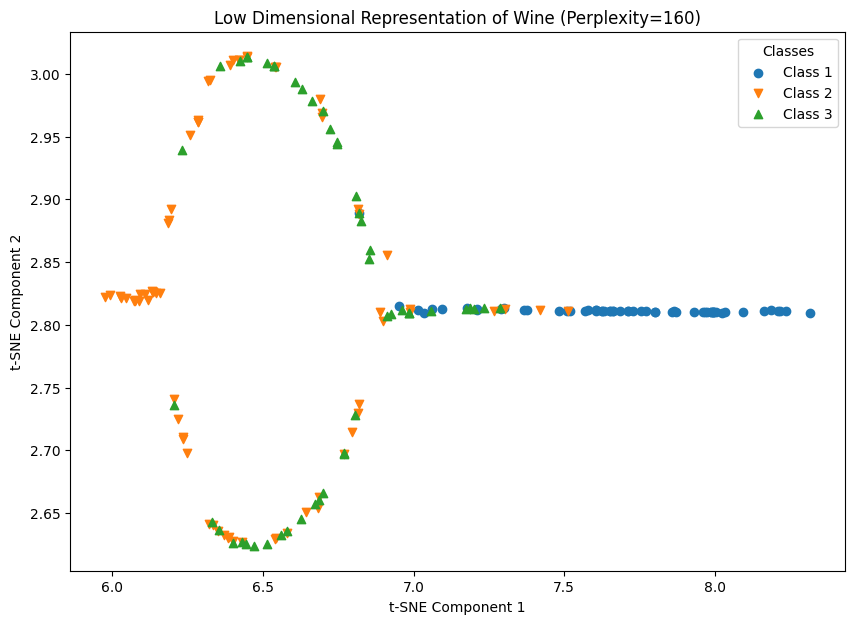

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 0.728442
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.364731
[t-SNE] KL divergence after 1000 iterations: 0.438307


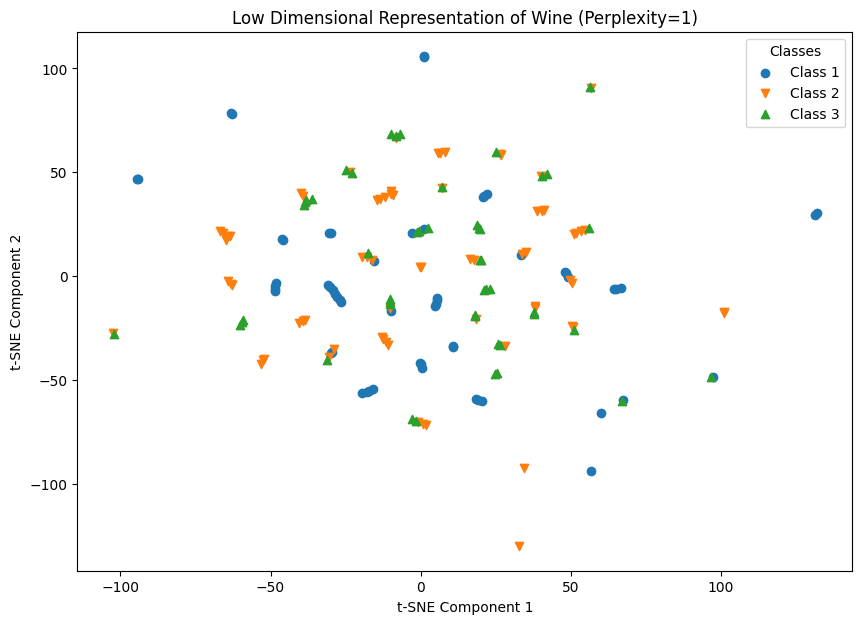

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 11.288603
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.224461
[t-SNE] KL divergence after 1000 iterations: 0.203509


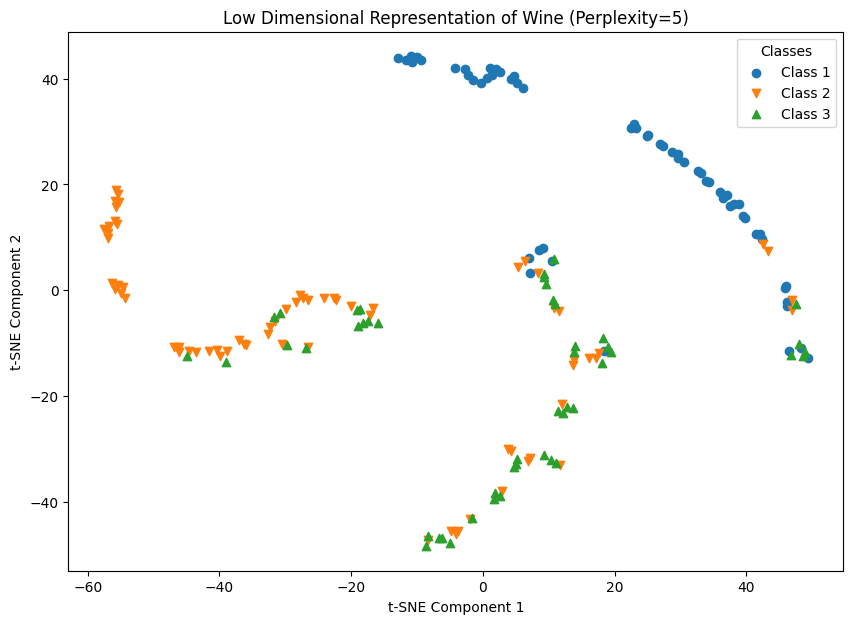

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 36.061430
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.009090
[t-SNE] KL divergence after 1000 iterations: 0.131862


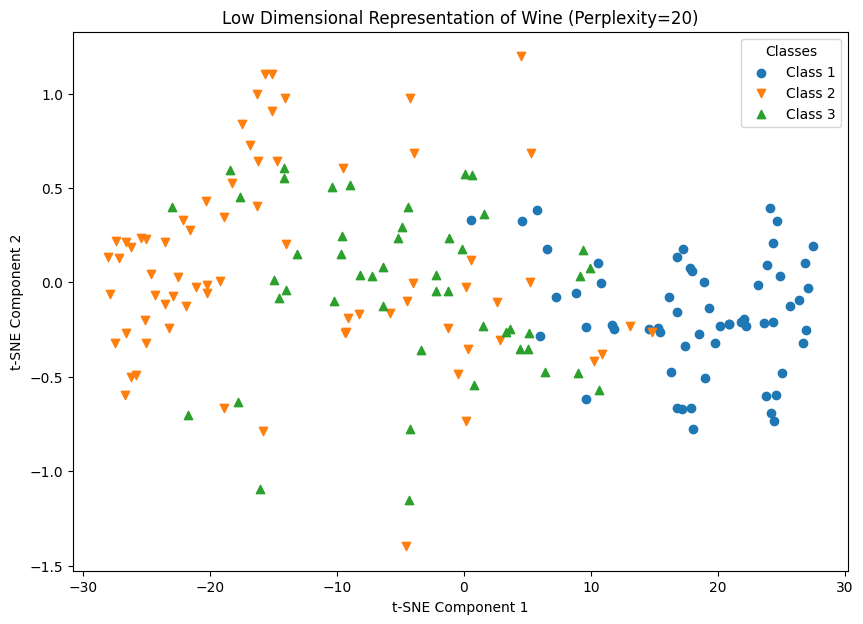

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 52.476897
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.411373
[t-SNE] KL divergence after 1000 iterations: 0.104741


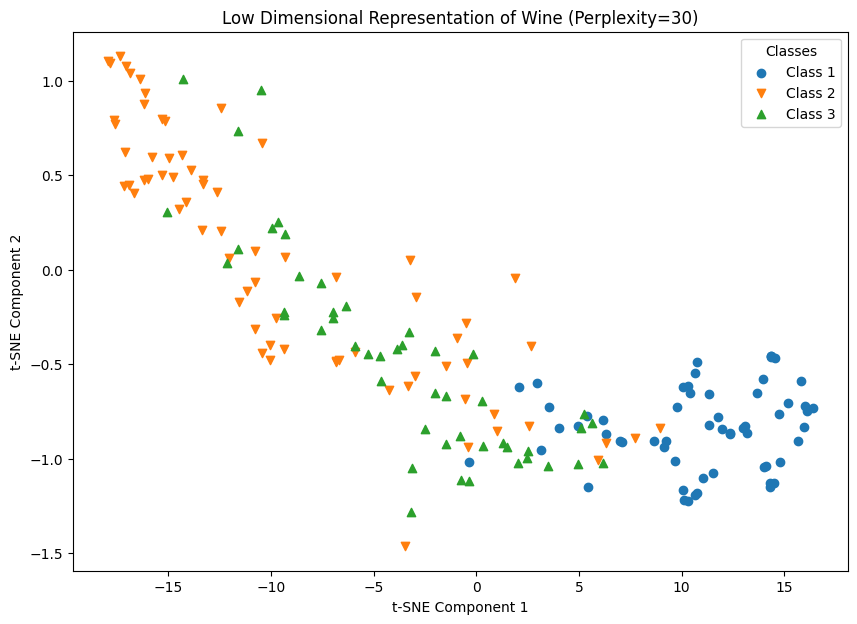

[t-SNE] Computing 177 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 150.912124
[t-SNE] KL divergence after 250 iterations with early exaggeration: 38.784050
[t-SNE] KL divergence after 750 iterations: 0.027982


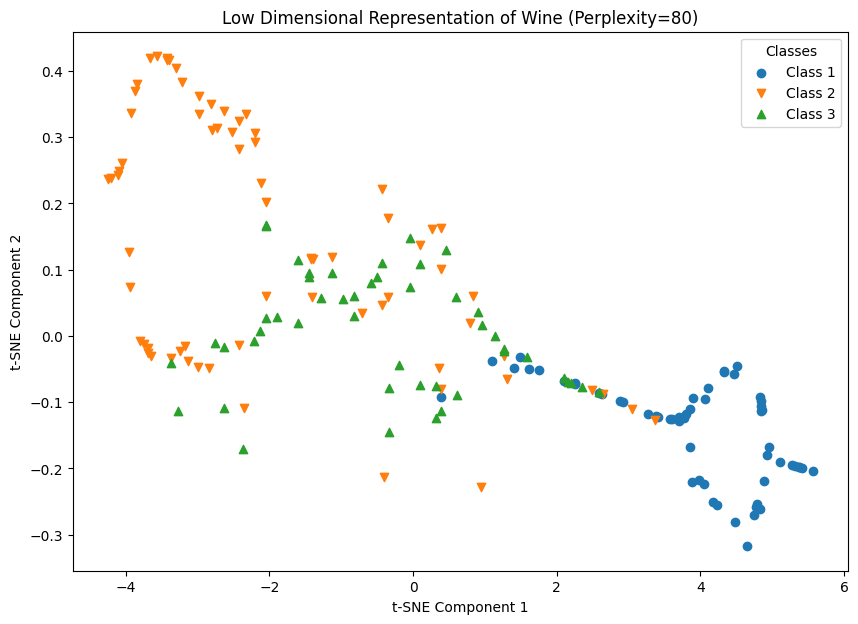

[t-SNE] Computing 177 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 544.541650
[t-SNE] KL divergence after 250 iterations with early exaggeration: 30.812246
[t-SNE] KL divergence after 1000 iterations: 0.000737


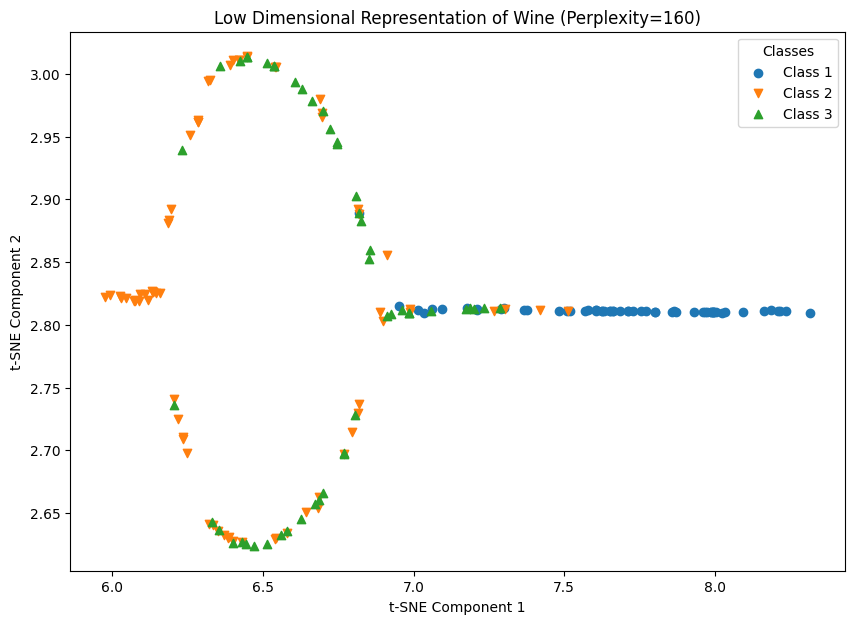

ValueError: perplexity must be less than n_samples

In [ ]:
print("Number of samples in the dataset:", data.shape[0])
# Check the number of samples in the dataset
n_samples = data.shape[0]
print("Number of samples in the dataset:", n_samples)

# Adjust the perplexity values to be less than the number of samples
for perp in [1, 5, 20, 30, 80, 160]:  # Remove 320 if n_samples < 320
    if perp < n_samples:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=42, verbose=1)
        X_tsne = tsne.fit_transform(data)

        plt.figure(figsize=(10, 7))
        plt.title(f'Low Dimensional Representation of Wine (Perplexity={perp})')
        for i, label in enumerate(np.unique(labels)):
            mask = (labels == label)
            plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], marker=markers[i % len(markers)], label=f'Class {label}')

        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.legend(title='Classes')
        plt.show()
    else:
        print(f"Perplexity value {perp} is too large for the number of samples in the dataset.")

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Define the markers for the scatter plot
markers = ['o', 'v', '^']

# Iterate through the list of perplexity values
for perp in [1, 5, 20, 30, 80, 160, 320]:
    # Create a t-SNE model with the specified perplexity value
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42, verbose=1)

    # Fit and transform the data to 2D
    X_tsne = tsne.fit_transform(data)

    # Create a scatter plot for the current perplexity value
    plt.figure(figsize=(10, 7))
    plt.title(f'Low Dimensional Representation of Wine (Perplexity={perp})')

    # Plot each class with different markers
    for i, label in enumerate(np.unique(labels)):
        mask = (labels == label)
        plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], marker=markers[i % len(markers)], label=f'Class {label}')

    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Classes')
    plt.show()

Construct a loop that iterates through the iteration values (250, 500, 1000). For each loop, generate a t-SNE model with the corresponding number of iterations and identical number of iterations without progress values:

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 52.476623
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.164497
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 52.476623
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.164497
[t-SNE] KL diverg

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


[t-SNE] KL divergence after 1000 iterations: 0.103759


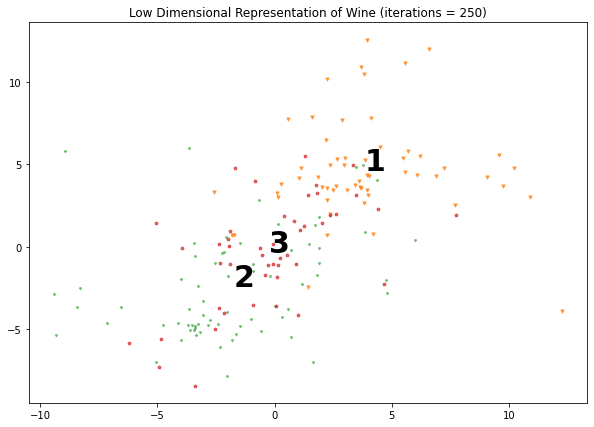

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


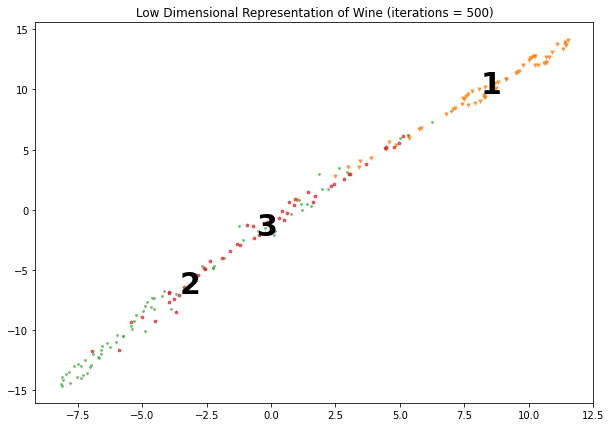

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


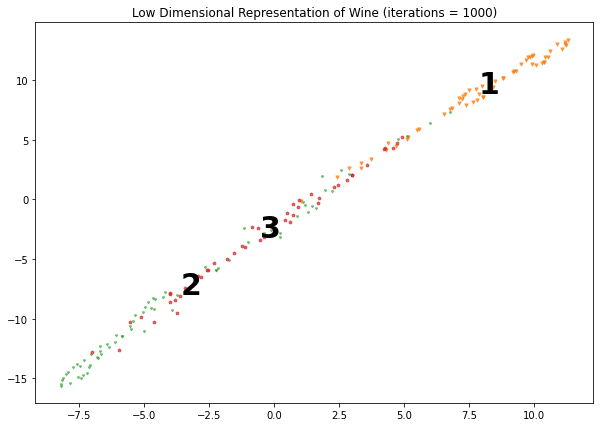

In [ ]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
for iterations in [250, 500, 1000]:
    model_tsne = TSNE(random_state=0, verbose=1, n_iter=iterations, n_iter_without_progress=iterations)
    wine_tsne = model_tsne.fit_transform(wine_pca)
    plt.figure(figsize=(10, 7))
    plt.title(f'Low Dimensional Representation of Wine (iterations = {iterations})');
    for i in range(10):
        selections = wine_tsne[labels == i]
        plt.scatter(selections[:,0], selections[:,1], alpha=0.7, marker=MARKER[i], s=10);
        x, y = selections.mean(axis=0)
        plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30})
plt.show()